<a href="https://colab.research.google.com/github/priyankanarwade/Machine_Learning_Project/blob/main/DeepLearning_text_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_true = pd.read_csv("/content/drive/MyDrive/priyanka narwade - True.csv")
df_fake = pd.read_csv("/content/drive/MyDrive/priyanka narwade - Fake.csv")

In [ ]:
df_true.shape

(21417, 4)

In [ ]:
df_fake.shape

(23481, 4)

In [ ]:
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
df_true['istrue']= 1

In [ ]:
df_fake['istrue']= 0

In [ ]:
df =pd.concat([df_true,df_fake]).reset_index(drop=True)

In [ ]:
df.head()

,title,text,subject,date,istrue
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [ ]:
df.drop(columns=['date'], inplace=True)

In [ ]:
df['news'] = df['title']+ " "+ df['text']

In [ ]:
df['news'][1]

'U.S. military to accept transgender recruits on Monday: Pentagon WASHINGTON (Reuters) - Transgender people will be allowed for the first time to enlist in the U.S. military starting on Monday as ordered by federal courts, the Pentagon said on Friday, after President Donald Trump’s administration decided not to appeal rulings that blocked his transgender ban. Two federal appeals courts, one in Washington and one in Virginia, last week rejected the administration’s request to put on hold orders by lower court judges requiring the military to begin accepting transgender recruits on Jan. 1. A Justice Department official said the administration will not challenge those rulings. “The Department of Defense has announced that it will be releasing an independent study of these issues in the coming weeks. So rather than litigate this interim appeal before that occurs, the administration has decided to wait for DOD’s study and will continue to defend the president’s lawful authority in District 

In [ ]:
print(df.isnull().sum())

title      0
text       0
subject    0
istrue     0
news       0
dtype: int64


In [ ]:
# to remove non url, numbers and punctuations
import re

In [ ]:
def clean_url(text):
    return re.sub(r'http\s+','',text)
    

In [ ]:
df['news']=df['news'].apply(clean_url)

In [ ]:
def clean_alphanumeric(text):
    return re.sub('[^a-zA-Z]',' ',text)

In [ ]:
df['news'] = df['news'].apply(clean_alphanumeric)

In [ ]:
df['news'][1]

'U S  military to accept transgender recruits on Monday  Pentagon WASHINGTON  Reuters    Transgender people will be allowed for the first time to enlist in the U S  military starting on Monday as ordered by federal courts  the Pentagon said on Friday  after President Donald Trump s administration decided not to appeal rulings that blocked his transgender ban  Two federal appeals courts  one in Washington and one in Virginia  last week rejected the administration s request to put on hold orders by lower court judges requiring the military to begin accepting transgender recruits on Jan     A Justice Department official said the administration will not challenge those rulings   The Department of Defense has announced that it will be releasing an independent study of these issues in the coming weeks  So rather than litigate this interim appeal before that occurs  the administration has decided to wait for DOD s study and will continue to defend the president s lawful authority in District 

In [ ]:
def clean_lowercase(text):
    return str(text).lower()

In [ ]:
df['news'] = df['news'].apply(clean_lowercase)

In [ ]:
df['news'][1]

'u s  military to accept transgender recruits on monday  pentagon washington  reuters    transgender people will be allowed for the first time to enlist in the u s  military starting on monday as ordered by federal courts  the pentagon said on friday  after president donald trump s administration decided not to appeal rulings that blocked his transgender ban  two federal appeals courts  one in washington and one in virginia  last week rejected the administration s request to put on hold orders by lower court judges requiring the military to begin accepting transgender recruits on jan     a justice department official said the administration will not challenge those rulings   the department of defense has announced that it will be releasing an independent study of these issues in the coming weeks  so rather than litigate this interim appeal before that occurs  the administration has decided to wait for dod s study and will continue to defend the president s lawful authority in district 

In [ ]:
import nltk
from nltk.tokenize import word_tokenize

In [ ]:
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
def clean_tokenization(text):
    return word_tokenize(text)

In [ ]:
df['news'][1375]

'u s  voting commission vice chair urged new voting restrictions washington  reuters    the vice chairman of a voter fraud panel set up by u s  president donald trump began soon after the election to draft legislative changes that would allow states to require voters to prove their citizenship when registering  court records show  kansas secretary of state kris kobach  who has been on the panel since its creation in may  exchanged emails on the matter with trump s transition team the day after the november presidential election  according to records unsealed by a federal judge on thursday  kobach  who like trump is a republican  was ordered to release the records as part of a legal challenge that has enjoined a state law that required kansans to provide proof of citizenship when registering to vote  the records showed that by the day after the election  kobach had already started drafting legislative changes that would permit all states to impose proof of citizenship requirements by am

In [ ]:
df['news'] = df['news'].apply(clean_tokenization)

In [ ]:
df['news'][1]


['u',
 's',
 'military',
 'to',
 'accept',
 'transgender',
 'recruits',
 'on',
 'monday',
 'pentagon',
 'washington',
 'reuters',
 'transgender',
 'people',
 'will',
 'be',
 'allowed',
 'for',
 'the',
 'first',
 'time',
 'to',
 'enlist',
 'in',
 'the',
 'u',
 's',
 'military',
 'starting',
 'on',
 'monday',
 'as',
 'ordered',
 'by',
 'federal',
 'courts',
 'the',
 'pentagon',
 'said',
 'on',
 'friday',
 'after',
 'president',
 'donald',
 'trump',
 's',
 'administration',
 'decided',
 'not',
 'to',
 'appeal',
 'rulings',
 'that',
 'blocked',
 'his',
 'transgender',
 'ban',
 'two',
 'federal',
 'appeals',
 'courts',
 'one',
 'in',
 'washington',
 'and',
 'one',
 'in',
 'virginia',
 'last',
 'week',
 'rejected',
 'the',
 'administration',
 's',
 'request',
 'to',
 'put',
 'on',
 'hold',
 'orders',
 'by',
 'lower',
 'court',
 'judges',
 'requiring',
 'the',
 'military',
 'to',
 'begin',
 'accepting',
 'transgender',
 'recruits',
 'on',
 'jan',
 'a',
 'justice',
 'department',
 'official',


In [ ]:
#importing the libraries required to remove the stopwords and punctuation
from nltk.corpus import stopwords

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
stop_words =set(stopwords.words('english'))

def clean_stopwords(token):
    return [item for item in token if item not in stop_words]

In [ ]:
df['news'] = df['news'].apply(clean_stopwords)


In [ ]:
df['news'][1]

['u',
 'military',
 'accept',
 'transgender',
 'recruits',
 'monday',
 'pentagon',
 'washington',
 'reuters',
 'transgender',
 'people',
 'allowed',
 'first',
 'time',
 'enlist',
 'u',
 'military',
 'starting',
 'monday',
 'ordered',
 'federal',
 'courts',
 'pentagon',
 'said',
 'friday',
 'president',
 'donald',
 'trump',
 'administration',
 'decided',
 'appeal',
 'rulings',
 'blocked',
 'transgender',
 'ban',
 'two',
 'federal',
 'appeals',
 'courts',
 'one',
 'washington',
 'one',
 'virginia',
 'last',
 'week',
 'rejected',
 'administration',
 'request',
 'put',
 'hold',
 'orders',
 'lower',
 'court',
 'judges',
 'requiring',
 'military',
 'begin',
 'accepting',
 'transgender',
 'recruits',
 'jan',
 'justice',
 'department',
 'official',
 'said',
 'administration',
 'challenge',
 'rulings',
 'department',
 'defense',
 'announced',
 'releasing',
 'independent',
 'study',
 'issues',
 'coming',
 'weeks',
 'rather',
 'litigate',
 'interim',
 'appeal',
 'occurs',
 'administration',
 'dec

In [ ]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

In [ ]:
def clean_stem(token):
    return[stemmer.stem(i) for i in token]

In [ ]:
df['news']=df['news'].apply(clean_stem)


In [ ]:
df['news'][1]

['u',
 'militari',
 'accept',
 'transgend',
 'recruit',
 'monday',
 'pentagon',
 'washington',
 'reuter',
 'transgend',
 'peopl',
 'allow',
 'first',
 'time',
 'enlist',
 'u',
 'militari',
 'start',
 'monday',
 'order',
 'feder',
 'court',
 'pentagon',
 'said',
 'friday',
 'presid',
 'donald',
 'trump',
 'administr',
 'decid',
 'appeal',
 'rule',
 'block',
 'transgend',
 'ban',
 'two',
 'feder',
 'appeal',
 'court',
 'one',
 'washington',
 'one',
 'virginia',
 'last',
 'week',
 'reject',
 'administr',
 'request',
 'put',
 'hold',
 'order',
 'lower',
 'court',
 'judg',
 'requir',
 'militari',
 'begin',
 'accept',
 'transgend',
 'recruit',
 'jan',
 'justic',
 'depart',
 'offici',
 'said',
 'administr',
 'challeng',
 'rule',
 'depart',
 'defens',
 'announc',
 'releas',
 'independ',
 'studi',
 'issu',
 'come',
 'week',
 'rather',
 'litig',
 'interim',
 'appeal',
 'occur',
 'administr',
 'decid',
 'wait',
 'dod',
 'studi',
 'continu',
 'defend',
 'presid',
 'law',
 'author',
 'district',
 '

In [ ]:
def clean_length(token):
  return [i for i in token if len(i)>3]

In [ ]:
df['news']=df['news'].apply(clean_length)

In [ ]:
df['news'][1]

['militari',
 'accept',
 'transgend',
 'recruit',
 'monday',
 'pentagon',
 'washington',
 'reuter',
 'transgend',
 'peopl',
 'allow',
 'first',
 'time',
 'enlist',
 'militari',
 'start',
 'monday',
 'order',
 'feder',
 'court',
 'pentagon',
 'said',
 'friday',
 'presid',
 'donald',
 'trump',
 'administr',
 'decid',
 'appeal',
 'rule',
 'block',
 'transgend',
 'feder',
 'appeal',
 'court',
 'washington',
 'virginia',
 'last',
 'week',
 'reject',
 'administr',
 'request',
 'hold',
 'order',
 'lower',
 'court',
 'judg',
 'requir',
 'militari',
 'begin',
 'accept',
 'transgend',
 'recruit',
 'justic',
 'depart',
 'offici',
 'said',
 'administr',
 'challeng',
 'rule',
 'depart',
 'defens',
 'announc',
 'releas',
 'independ',
 'studi',
 'issu',
 'come',
 'week',
 'rather',
 'litig',
 'interim',
 'appeal',
 'occur',
 'administr',
 'decid',
 'wait',
 'studi',
 'continu',
 'defend',
 'presid',
 'author',
 'district',
 'court',
 'meantim',
 'offici',
 'said',
 'speak',
 'condit',
 'anonym',
 'se

In [ ]:
def convert_to_string(text):
  return " ".join(text)

In [ ]:
df['news']=df['news'].apply(convert_to_string)

In [ ]:
df['news'][1]

'militari accept transgend recruit monday pentagon washington reuter transgend peopl allow first time enlist militari start monday order feder court pentagon said friday presid donald trump administr decid appeal rule block transgend feder appeal court washington virginia last week reject administr request hold order lower court judg requir militari begin accept transgend recruit justic depart offici said administr challeng rule depart defens announc releas independ studi issu come week rather litig interim appeal occur administr decid wait studi continu defend presid author district court meantim offici said speak condit anonym septemb pentagon said creat panel senior offici studi implement direct trump prohibit transgend individu serv defens depart submit plan trump lawyer repres current serv transgend servic member aspir recruit said expect administr appeal rule conserv major suprem court hope would happen pentagon spokeswoman heather babb said statement mandat court order depart de

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df['news']
y = df['istrue']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state= 43)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, f_classif

In [ ]:
vectorizer = TfidfVectorizer( 
                             strip_accents='unicode', 
                             decode_error='replace',
                             dtype='int32',                              
                             analyzer="word", 
                             ngram_range=(1, 2), 
                             min_df=2)

In [ ]:
Xtrain = vectorizer.fit_transform(X_train)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:2032: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. int32 'dtype' will be converted to np.float64.
  UserWarning,


In [ ]:
Xtrain.shape

(35918, 1074591)

In [ ]:
Xtest = vectorizer.transform(X_test)

In [ ]:
selector = SelectKBest(f_classif, k = min(20000, Xtrain.shape[1]))
selector.fit(Xtrain, y_train)

SelectKBest(k=20000)

In [ ]:
Xtrain = selector.transform(Xtrain).astype('float32')
Xtest = selector.transform(Xtest).astype('float32')

In [ ]:
Xtrain.shape

(35918, 20000)

In [ ]:
Xtest.shape

(8980, 20000)

In [ ]:
ytrain = np.array(y_train)
ytest = np.array(y_test)

In [ ]:
Xtrain = Xtrain.toarray()
Xtest = Xtest.toarray()

In [ ]:
Xtrain.shape

(35918, 20000)

In [ ]:
import tensorflow
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout

In [ ]:
trueANN = Sequential()

In [ ]:
trueANN.add(Dense(units=512, activation='relu', input_dim=20000))
trueANN.add(Dense(units=1, activation='sigmoid'))

In [ ]:
trueANN.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

mc = ModelCheckpoint(filepath='bestpredictionTrue.h5', monitor='val_accuracy', verbose=1, save_best_only=True)


In [ ]:
history = trueANN.fit(Xtrain, ytrain, epochs=10, callbacks=[mc], validation_split=0.2)

Epoch 1/10
897/898 [============================>.] - ETA: 0s - loss: 0.0749 - accuracy: 0.9814
Epoch 1: val_accuracy improved from -inf to 0.99318, saving model to bestpredictionTrue.h5
898/898 [==============================] - 34s 37ms/step - loss: 0.0749 - accuracy: 0.9814 - val_loss: 0.0233 - val_accuracy: 0.9932
Epoch 2/10
897/898 [============================>.] - ETA: 0s - loss: 0.0068 - accuracy: 0.9987
Epoch 2: val_accuracy did not improve from 0.99318
898/898 [==============================] - 33s 37ms/step - loss: 0.0068 - accuracy: 0.9987 - val_loss: 0.0215 - val_accuracy: 0.9928
Epoch 3/10
898/898 [==============================] - ETA: 0s - loss: 0.0014 - accuracy: 0.9998
Epoch 3: val_accuracy did not improve from 0.99318
898/898 [==============================] - 33s 37ms/step - loss: 0.0014 - accuracy: 0.9998 - val_loss: 0.0223 - val_accuracy: 0.9928
Epoch 4/10
897/898 [============================>.] - ETA: 0s - loss: 5.3986e-04 - accuracy: 1.0000
Epoch 4: val_accurac

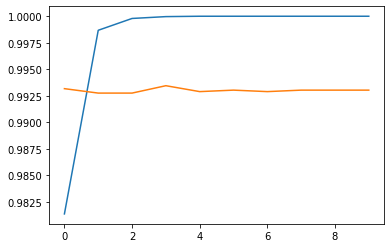

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [ ]:
newmodel = load_model('bestpredictionTrue.h5')

In [ ]:
newmodel.evaluate(Xtest, ytest)

281/281 [==============================] - 4s 13ms/step - loss: 0.0198 - accuracy: 0.9937


[0.019805682823061943, 0.9936525821685791]